In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import math

In [2]:
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score as f1
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.linear_model import LinearRegression as linreg
from sklearn.metrics import mean_squared_error as rmse

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score ,roc_auc_score as auc, accuracy_score as acc, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve,average_precision_score,average_precision_score as aps,log_loss as ll

from pandas.core.common import SettingWithCopyWarning
from sklearn.exceptions import FitFailedWarning
import warnings
warnings.simplefilter(action='ignore', category=FitFailedWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [3]:
from sklearn.tree import DecisionTreeRegressor as dtr,export_graphviz
from sklearn.model_selection import GridSearchCV as gs, RandomizedSearchCV as rs
from sklearn.metrics import make_scorer
import graphviz

## random state

In [4]:
r=6

In [5]:
data = pd.read_csv('spotify_data.csv')
data.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


## Missing Value

In [6]:
data.isnull().sum()

Position        0
Track Name    657
Artist        657
Streams         0
URL             8
Date            0
Region          0
dtype: int64

In [7]:
data.dropna(inplace=True)

## Preprocessing

### track_names

In [8]:
data.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [9]:
le = preprocessing.LabelEncoder()
#data['Track Name']=le.fit_transform(data['Track Name'])
data['Artist']=le.fit_transform(data['Artist'])
#data['Region']=le.fit_transform(data['Region'])

removing url column

In [10]:
data.drop(['URL'], axis=1,inplace=True)

In [11]:
data.head()

,Position,Track Name,Artist,Streams,Date,Region
0,1,Reggaetón Lento (Bailemos),897,19272,2017-01-01,ec
1,2,Chantaje,5194,19270,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),6331,15761,2017-01-01,ec
3,4,Vente Pa' Ca,4854,14954,2017-01-01,ec
4,5,Safari,2523,14269,2017-01-01,ec


## Date

In [12]:
data['Date'].max(), data['Date'].min()

('2018-01-09', '2017-01-01')

In [13]:
data['Date'] = pd.to_datetime(data['Date'], format= '%Y-%m-%d')
data.dtypes

Position               int64
Track Name            object
Artist                 int64
Streams                int64
Date          datetime64[ns]
Region                object
dtype: object

In [14]:
data['Date'].max(), data['Date'].min()

(Timestamp('2018-01-09 00:00:00'), Timestamp('2017-01-01 00:00:00'))

### extracting

year

In [15]:
data['Date'].dt.year

0          2017
1          2017
2          2017
3          2017
4          2017
           ... 
3441192    2018
3441193    2018
3441194    2018
3441195    2018
3441196    2018
Name: Date, Length: 3440540, dtype: int64

In [16]:
data['Date'].dt.year.value_counts()

2017    3355829
2018      84711
Name: Date, dtype: int64

month

In [17]:
data['Date'].dt.month

0          1
1          1
2          1
3          1
4          1
          ..
3441192    1
3441193    1
3441194    1
3441195    1
3441196    1
Name: Date, Length: 3440540, dtype: int64

In [18]:
data['Date'].dt.month.value_counts()

1     361156
12    297611
7     290305
10    289677
8     289439
3     285994
11    280138
9     280084
4     274391
6     269533
5     268020
2     254192
Name: Date, dtype: int64

day of month

In [19]:
data['Date'].dt.day

0          1
1          1
2          1
3          1
4          1
          ..
3441192    9
3441193    9
3441194    9
3441195    9
3441196    9
Name: Date, Length: 3440540, dtype: int64

In [20]:
data['Date'].dt.day.value_counts()[0:5]

8    120677
9    120677
7    120522
5    120435
4    120404
Name: Date, dtype: int64

In [21]:
len(data['Date'].dt.day.value_counts())

31

day of year

In [22]:
data['Date'].dt.dayofyear

0          1
1          1
2          1
3          1
4          1
          ..
3441192    9
3441193    9
3441194    9
3441195    9
3441196    9
Name: Date, Length: 3440540, dtype: int64

In [23]:
data['Date'].dt.dayofyear.value_counts()

5     18432
6     18402
9     18389
8     18220
4     18197
      ...  
23     8891
29     8889
11     8875
10     8840
15     8829
Name: Date, Length: 362, dtype: int64

In [24]:
len(data['Date'].dt.dayofyear.value_counts())

362

day of week

In [25]:
data['Date'].dt.dayofweek

0          6
1          6
2          6
3          6
4          6
          ..
3441192    1
3441193    1
3441194    1
3441195    1
3441196    1
Name: Date, Length: 3440540, dtype: int64

In [26]:
data['Date'].dt.dayofweek.value_counts()

0    497277
5    493745
3    493319
1    491527
6    491422
4    490420
2    482830
Name: Date, dtype: int64

day of week name

In [27]:
data['Date'].dt.day_name()

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
            ...   
3441192    Tuesday
3441193    Tuesday
3441194    Tuesday
3441195    Tuesday
3441196    Tuesday
Name: Date, Length: 3440540, dtype: object

## Put it all together

In [28]:
date_data = pd.DataFrame({"Year": data['Date'].dt.year,
              "Month": data['Date'].dt.month,
              "Day Of Month": data['Date'].dt.day,
              "Day Of Year": data['Date'].dt.dayofyear,
              "Day Of Week": data['Date'].dt.dayofweek,
              "Day Of Week Name": data['Date'].dt.day_name()
             })
date_data.head()

,Year,Month,Day Of Month,Day Of Year,Day Of Week,Day Of Week Name
0,2017,1,1,1,6,Sunday
1,2017,1,1,1,6,Sunday
2,2017,1,1,1,6,Sunday
3,2017,1,1,1,6,Sunday
4,2017,1,1,1,6,Sunday


In [29]:
data.shape

(3440540, 6)

In [30]:
date_data.shape

(3440540, 6)

joining date_data to main data

In [31]:
data=data.join(date_data.set_index(data.index), on=data.index).copy()

removing date column

In [32]:
data.drop(['Date'], axis=1,inplace=True)

In [33]:
data.head()

,Position,Track Name,Artist,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week,Day Of Week Name
0,1,Reggaetón Lento (Bailemos),897,19272,ec,2017,1,1,1,6,Sunday
1,2,Chantaje,5194,19270,ec,2017,1,1,1,6,Sunday
2,3,Otra Vez (feat. J Balvin),6331,15761,ec,2017,1,1,1,6,Sunday
3,4,Vente Pa' Ca,4854,14954,ec,2017,1,1,1,6,Sunday
4,5,Safari,2523,14269,ec,2017,1,1,1,6,Sunday


we will need Day Of Week Name for eda but we dont need for forecasting so temporarily removing it

In [34]:
data.drop(['Day Of Week Name'], axis=1,inplace=True)
data.head()

,Position,Track Name,Artist,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
0,1,Reggaetón Lento (Bailemos),897,19272,ec,2017,1,1,1,6
1,2,Chantaje,5194,19270,ec,2017,1,1,1,6
2,3,Otra Vez (feat. J Balvin),6331,15761,ec,2017,1,1,1,6
3,4,Vente Pa' Ca,4854,14954,ec,2017,1,1,1,6
4,5,Safari,2523,14269,ec,2017,1,1,1,6


In [35]:
data.shape

(3440540, 10)

basic analysis

positions are rankings of tracks from 1 to 200

In [36]:
data['Position'].value_counts()

1      19667
7      19660
6      19659
5      19655
8      19654
       ...  
196    14448
197    14434
198    14421
199    14411
200    14402
Name: Position, Length: 200, dtype: int64

In [37]:
len(data['Position'].value_counts())

200

postion 1 

In [38]:
data[data['Position']==1]['Track Name'].value_counts()

Shape of You                           3639
Despacito - Remix                      2342
rockstar                               1690
Despacito (Featuring Daddy Yankee)     1560
Mi Gente                               1180
                                       ... 
Zone (feat. Nekfeu & Dizzee Rascal)       1
Ride Or Die                               1
Volare                                    1
Kylmii Väreitä                            1
Let Me Love You                           1
Name: Track Name, Length: 256, dtype: int64

on postion 1 we have 256 tracks for example

In [39]:
len(data[data['Position']==1]['Track Name'].value_counts())

256

position 200

In [40]:
data[data['Position']==200]['Track Name'].value_counts()

Wonderwall - Remastered    75
Let Her Go                 62
Stay With Me               60
Love Yourself              55
7 Years                    50
                           ..
Status Quo                  1
Santa's Coming For Us       1
HIGHLEVEL IGNORANZ          1
Mistletoe and Wine          1
遙不可及 - 劇集 "降魔的" 片尾曲         1
Name: Track Name, Length: 4151, dtype: int64

 on postion 200 we have 4151 tracks for example

In [41]:
len(data[data['Position']==200]['Track Name'].value_counts())

4151

track name and artist

In [42]:
data['Track Name'].value_counts()

Shape of You                               19365
Believer                                   16775
Despacito (Featuring Daddy Yankee)         16284
Something Just Like This                   16194
Rockabye (feat. Sean Paul & Anne-Marie)    16177
                                           ...  
Sweet Little Jesus Boy                         1
My Christmas Prayer                            1
Pretty Paper                                   1
What Child Is This?                            1
無期                                             1
Name: Track Name, Length: 18597, dtype: int64

In [43]:
len(data['Track Name'].value_counts())

18597

In [44]:
data[data['Track Name']==1]['Artist']

Series([], Name: Artist, dtype: int64)

In [45]:
data[data['Track Name']==200]['Artist']

Series([], Name: Artist, dtype: int64)

note for each track name there is one and only one artist so each track corresponds to one artist so for prediction artist variable is not required, for eda visualization and data analysis though we will require artist name and trck name

## analysis

In [46]:
data.head()

,Position,Track Name,Artist,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
0,1,Reggaetón Lento (Bailemos),897,19272,ec,2017,1,1,1,6
1,2,Chantaje,5194,19270,ec,2017,1,1,1,6
2,3,Otra Vez (feat. J Balvin),6331,15761,ec,2017,1,1,1,6
3,4,Vente Pa' Ca,4854,14954,ec,2017,1,1,1,6
4,5,Safari,2523,14269,ec,2017,1,1,1,6


# Months vs tracks

In [47]:
track_month_table=data.pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

track_month_table.fillna(0, inplace=True)

track_month_table.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Track Name,,,,,,,,,,,,
"""All That Is or Ever Was or Ever Will Be""",7311.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Read All About It, Pt. III""",0.0,34199.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22826.0,0.0,0.0
#99,31826.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Askip,296862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Biziz - feat. Lil Bege,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271192.0,132399.0,0.0,0.0


In [48]:
track_month=pd.DataFrame(columns=['Month','Track with most streams','No of Streams']).copy()

for i in track_month:
    
    track_month[i]=np.zeros(12, dtype=int)
    
track_month

,Month,Track with most streams,No of Streams
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [49]:
index=0

for i in track_month_table:
    
    track_month['Month'][index]=i
    
    track_month['No of Streams'][index]=sorted(track_month_table.iloc[:,index],reverse=True)[0]
    
    track_month['Track with most streams'][index]= track_month_table.index[track_month_table.iloc[:,index]==track_month['No of Streams'][index]].values[0]
    
    index=index+1

In [50]:
track_month

,Month,Track with most streams,No of Streams
0,1,Shape of You,405681011
1,2,Shape of You,407227623
2,3,Shape of You,469111248
3,4,Shape of You,340035736
4,5,Despacito - Remix,389445999
5,6,Despacito - Remix,384304420
6,7,Despacito - Remix,324530644
7,8,Mi Gente,281206000
8,9,Mi Gente,237994936
9,10,rockstar,391652771


creating a list of Tracks with most streams on a particular month and creating a column for their respective streams each month

In [51]:
tracks=track_month['Track with most streams'].value_counts().index.tolist()

for i in tracks:
    
    track_month[i]=track_month_table.loc[i].tolist()
    


In [52]:
track_month

,Month,Track with most streams,No of Streams,Shape of You,Despacito - Remix,rockstar,Mi Gente
0,1,Shape of You,405681011,405681011.0,20633443.0,73770039.0,25718074.0
1,2,Shape of You,407227623,407227623.0,0.0,0.0,0.0
2,3,Shape of You,469111248,469111248.0,0.0,0.0,0.0
3,4,Shape of You,340035736,340035736.0,153891409.0,0.0,0.0
4,5,Despacito - Remix,389445999,269169687.0,389445999.0,0.0,0.0
5,6,Despacito - Remix,384304420,219295280.0,384304420.0,0.0,2322165.0
6,7,Despacito - Remix,324530644,199073911.0,324530644.0,0.0,201584493.0
7,8,Mi Gente,281206000,166852553.0,218671024.0,0.0,281206000.0
8,9,Mi Gente,237994936,137980741.0,126778308.0,182502201.0,237994936.0
9,10,rockstar,391652771,127884795.0,88654326.0,391652771.0,150627119.0


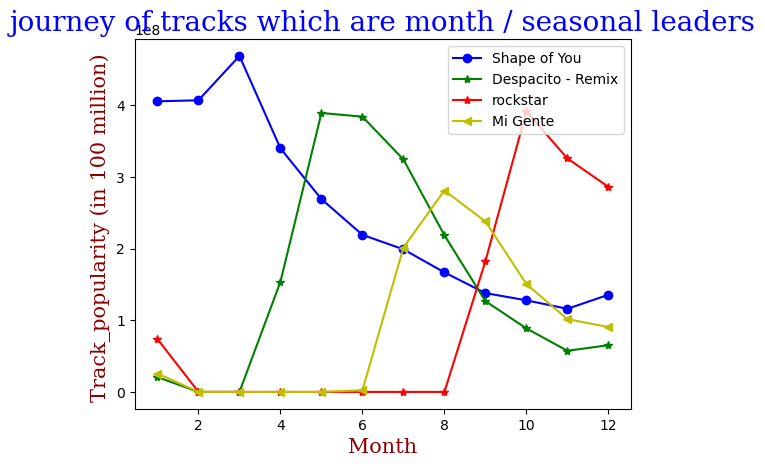

In [53]:
 # fonts

 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # font of axes
 font2 = {'family':'serif','color':'darkred','size':15}

 # font of text displayed on graph
 font_text = {'family':'serif','color':'darkgreen','size':10}
 
    
    
 # plotting title and x,y labels on graph

 # Title
 plt.title("journey of tracks which are month / seasonal leaders", fontdict = font1)

 # X label
 plt.xlabel("Month", fontdict = font2)

 # Y label
 plt.ylabel("Track_popularity (in 100 million) ", fontdict = font2)


    
 plt.plot(track_month['Month'], track_month['Shape of You'], 'bo-',label='Shape of You')
    
 plt.plot(track_month['Month'], track_month['Despacito - Remix'], 'g*-', label='Despacito - Remix')
    
 plt.plot(track_month['Month'], track_month['rockstar'], 'r*-', label='rockstar')

 plt.plot(track_month['Month'], track_month['Mi Gente'], 'y<-', label='Mi Gente')
    

 plt.legend()

 
 # show the plot
 plt.show()

### top 10 songs each month

#### month 1

In [141]:
month1_track_analysis=data[data['Month']==1].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month1_track_analysis.fillna(0, inplace=True)

month1_track_analysis.head()

Month,1
Track Name,
"""All That Is or Ever Was or Ever Will Be""",7311
#99,31826
#Askip,296862
#HEY!,46013
#JM,465983


In [146]:
month1_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month1_top10['No of Streams']=sorted(month1_track_analysis[1],reverse=True)[:10]

for i in range(len(month1_top10['No of Streams'])):
    
    month1_top10['top 10 tracks'][i]=month1_track_analysis.index[month1_track_analysis[1] == month1_top10['No of Streams'][i]].values[0]

month1_top10

,No of Streams,top 10 tracks
0,405681011,Shape of You
1,214554892,Starboy
2,212584705,Castle on the Hill
3,206929898,I Don’t Wanna Live Forever (Fifty Shades Darke...
4,200115451,Rockabye (feat. Sean Paul & Anne-Marie)
5,190612937,Closer
6,174507136,Say You Won't Let Go
7,161917210,I Feel It Coming
8,156120058,Don't Wanna Know
9,151195706,Fake Love


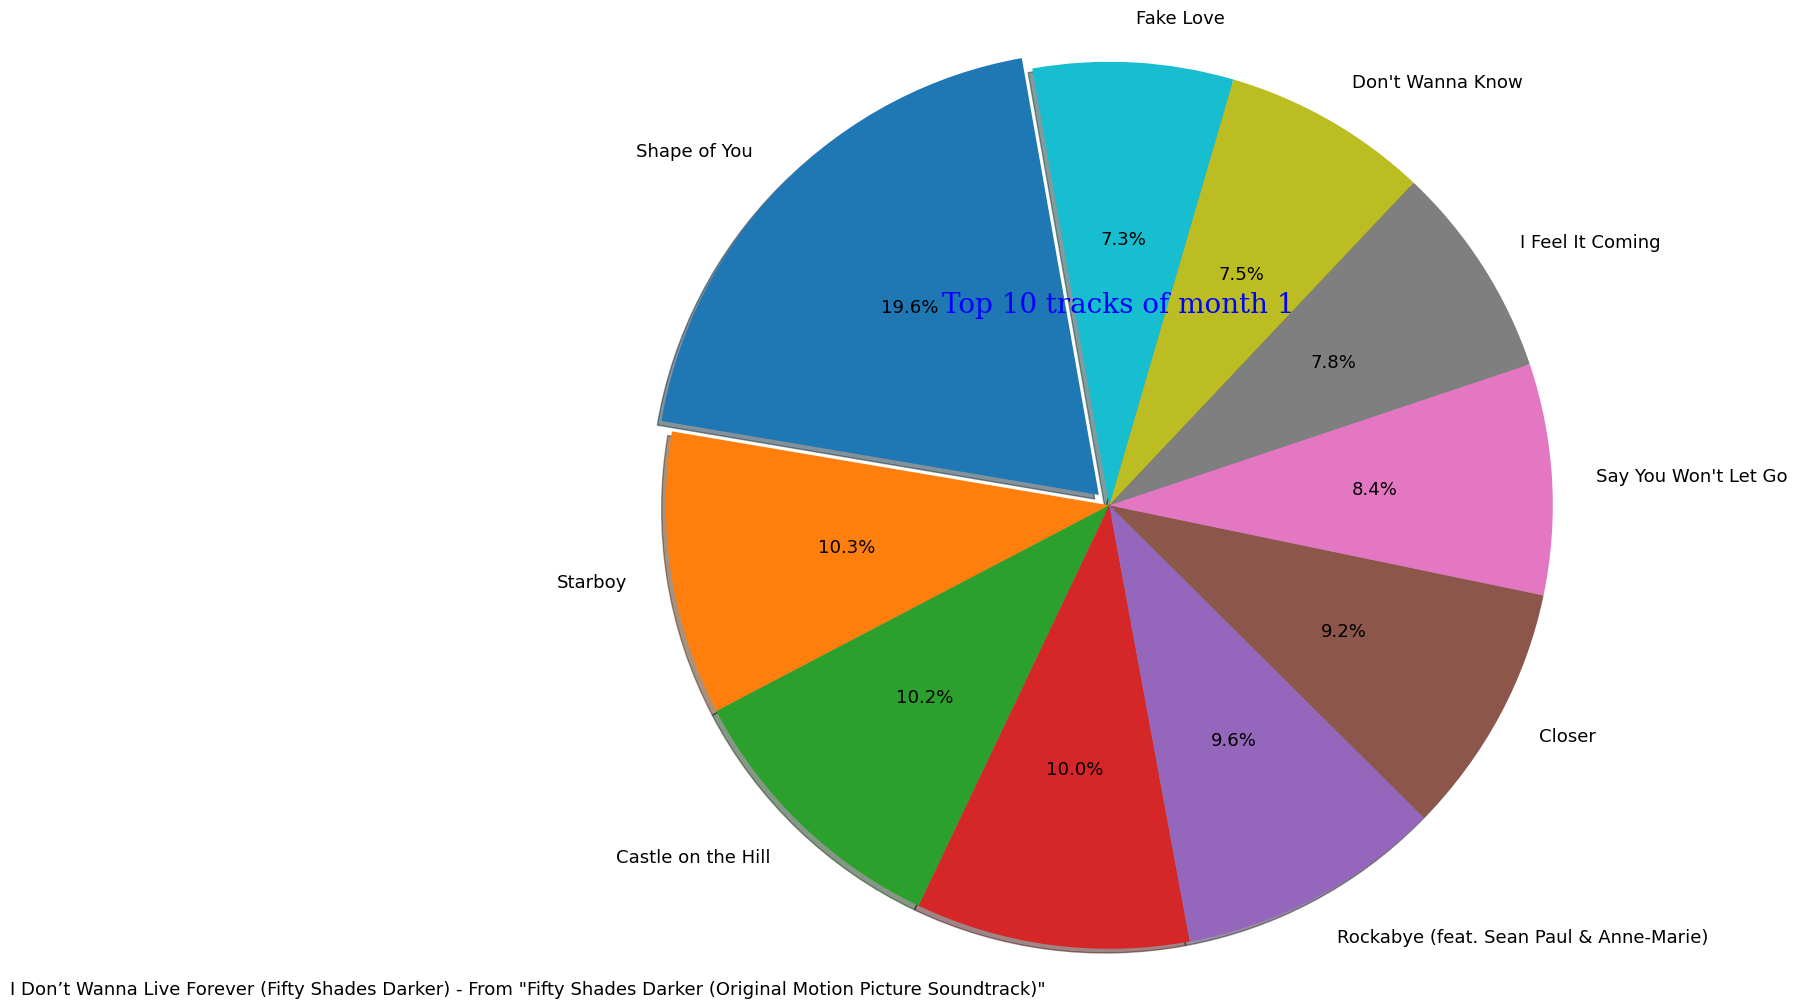

In [235]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 1", fontdict = font1, loc = 'right')


 plt.pie(month1_top10['No of Streams'], labels = month1_top10['top 10 tracks'], textprops={'fontsize': 13}, startangle=100,
         explode = (.1, 0, 0, 0, 0, 0, 0, 0, 0, 0), shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 2

In [170]:
month2_track_analysis=data[data['Month']==2].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month2_track_analysis.fillna(0, inplace=True)

month2_track_analysis.head()

Month,2
Track Name,
"""Read All About It, Pt. III""",34199
#HEY!,36299
#hashdark,2530
#háttérzaj,3741
'Till I Collapse,15018601


In [173]:
month2_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month2_top10['No of Streams']=sorted(month2_track_analysis[2],reverse=True)[:10]

for i in range(len(month2_top10['No of Streams'])):
    
    month2_top10['top 10 tracks'][i]=month2_track_analysis.index[month2_track_analysis[2] == month2_top10['No of Streams'][i]].values[0]

month2_top10

,No of Streams,top 10 tracks
0,407227623,Shape of You
1,223633104,I Don’t Wanna Live Forever (Fifty Shades Darke...
2,212658310,Paris
3,202291897,Despacito (Featuring Daddy Yankee)
4,161138178,Scared to Be Lonely
5,160727365,Castle on the Hill
6,157802483,Rockabye (feat. Sean Paul & Anne-Marie)
7,137822676,Starboy
8,137505237,Say You Won't Let Go
9,136660839,I Feel It Coming


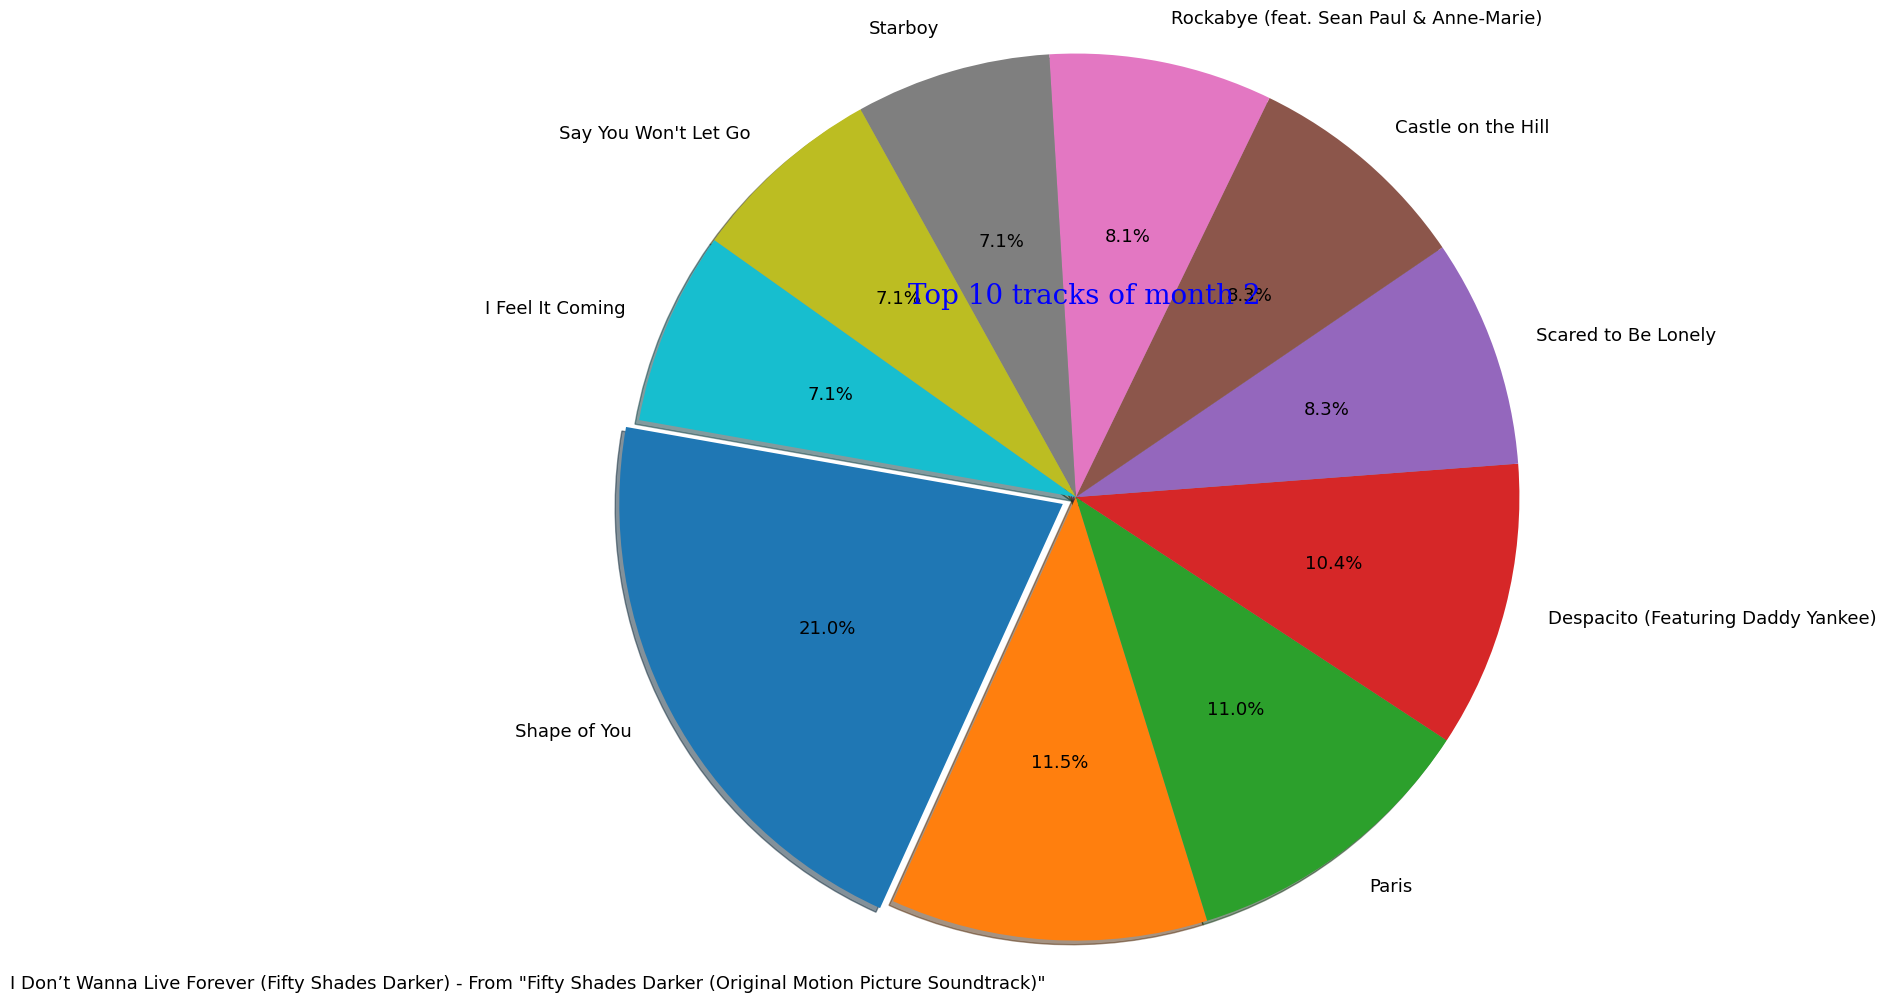

In [230]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 2", fontdict = font1, loc = 'right')


 plt.pie(month2_top10['No of Streams'], labels = month2_top10['top 10 tracks'], textprops={'fontsize': 13}, startangle=170,
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0), shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 3

In [192]:
month3_track_analysis=data[data['Month']==3].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month3_track_analysis.fillna(0, inplace=True)

month3_track_analysis.head()

Month,3
Track Name,
#HEY!,22272
#SorryNotSorry - 3onderboy remix,7242
#hashdark,3799
'Till I Collapse,7689474
(No One Knows Me) Like the Piano,35290


In [193]:
month3_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month3_top10['No of Streams']=sorted(month3_track_analysis[3],reverse=True)[:10]

for i in range(len(month3_top10['No of Streams'])):
    
    month3_top10['top 10 tracks'][i]=month3_track_analysis.index[month3_track_analysis[3] == month3_top10['No of Streams'][i]].values[0]

month3_top10

,No of Streams,top 10 tracks
0,469111248,Shape of You
1,256554494,It Ain't Me (with Selena Gomez)
2,245218470,Something Just Like This
3,222018353,Galway Girl
4,204776812,Despacito (Featuring Daddy Yankee)
5,195707966,I Don’t Wanna Live Forever (Fifty Shades Darke...
6,194000899,Castle on the Hill
7,190931858,Paris
8,181394387,That's What I Like
9,177795344,Stay (with Alessia Cara)


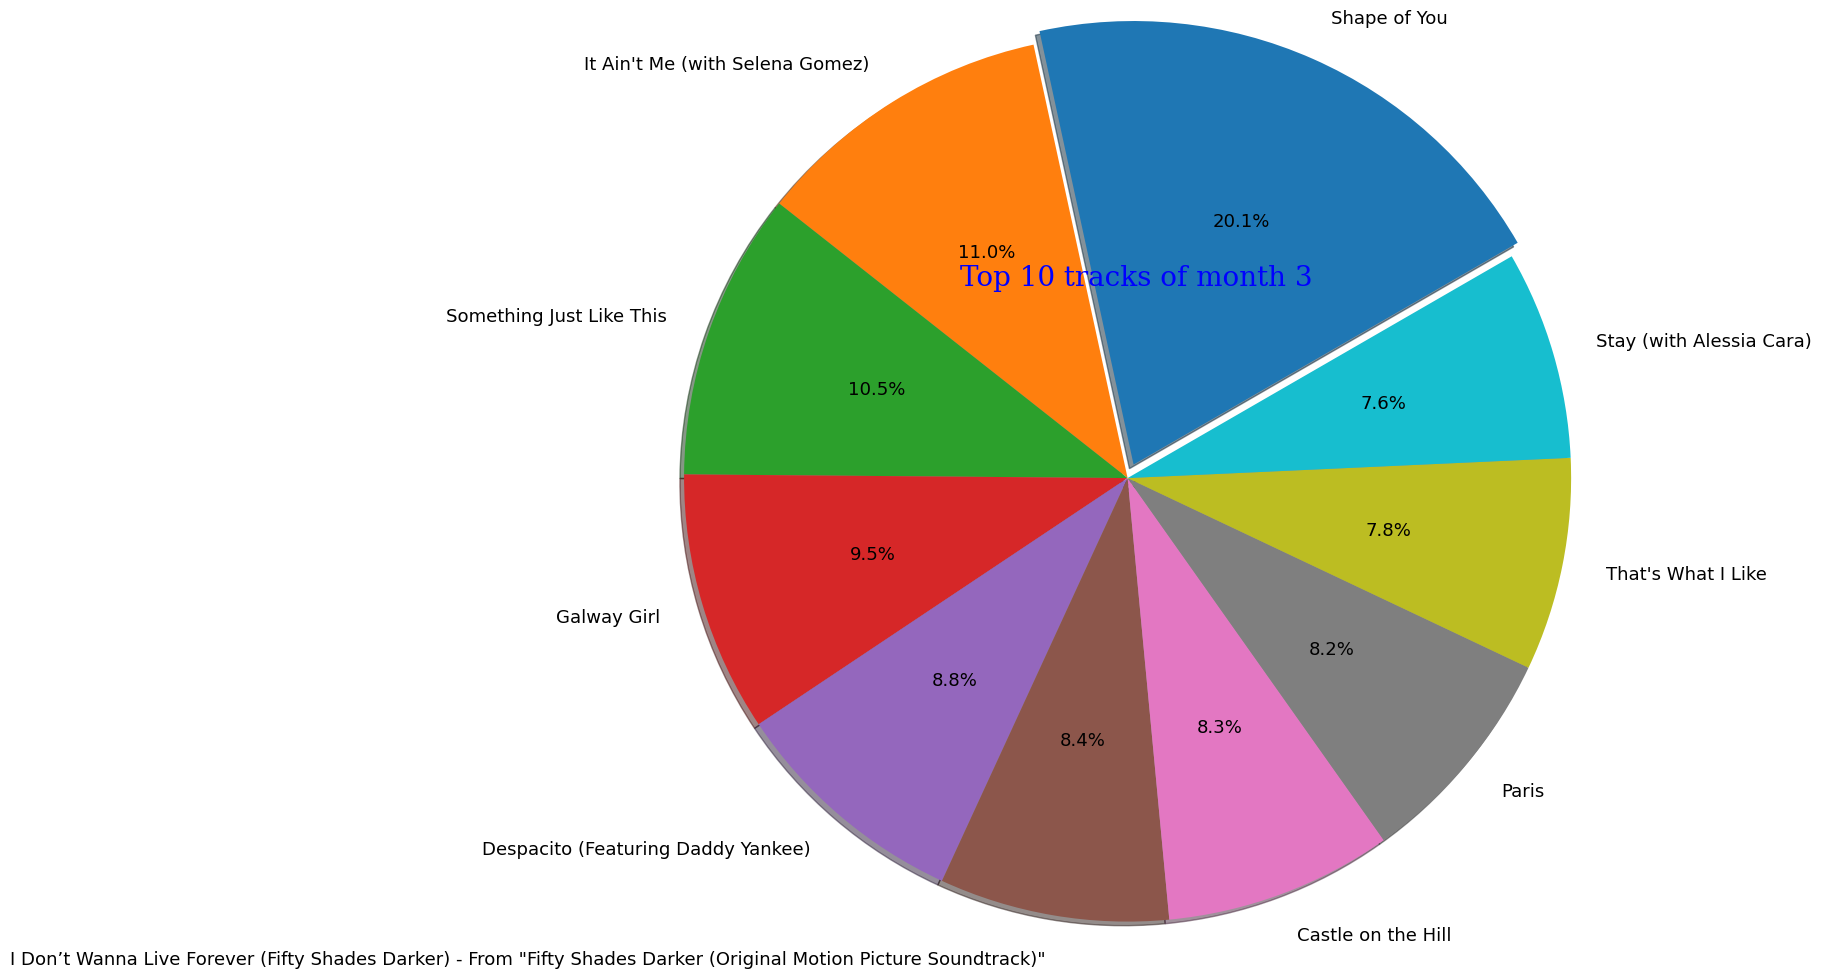

In [238]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 3", fontdict = font1, loc = 'right')

 plt.pie(month3_top10['No of Streams'], labels = month3_top10['top 10 tracks'], textprops={'fontsize': 13}, startangle=30,
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0), shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 4

In [195]:
month4_track_analysis=data[data['Month']==4].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month4_track_analysis.fillna(0, inplace=True)

month4_track_analysis.head()

Month,4
Track Name,
#HEY!,4451
'Till I Collapse,1820714
+1,123224
"0 Sentimientos (Remix) [feat. Noriel, Darkiel, Lyan, Messiah & Baby Rasta]",981108
1 Night,180123


In [197]:
month4_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month4_top10['No of Streams']=sorted(month4_track_analysis[4],reverse=True)[:10]

for i in range(len(month4_top10['No of Streams'])):
    
    month4_top10['top 10 tracks'][i]=month4_track_analysis.index[month4_track_analysis[4] == month4_top10['No of Streams'][i]].values[0]

month4_top10

,No of Streams,top 10 tracks
0,340035736,Shape of You
1,275145533,HUMBLE.
2,230799878,Something Just Like This
3,216530554,It Ain't Me (with Selena Gomez)
4,206730740,Passionfruit
5,203646980,Mask Off
6,190429482,That's What I Like
7,189327864,Stay (with Alessia Cara)
8,177051386,Despacito (Featuring Daddy Yankee)
9,175319498,Symphony (feat. Zara Larsson)


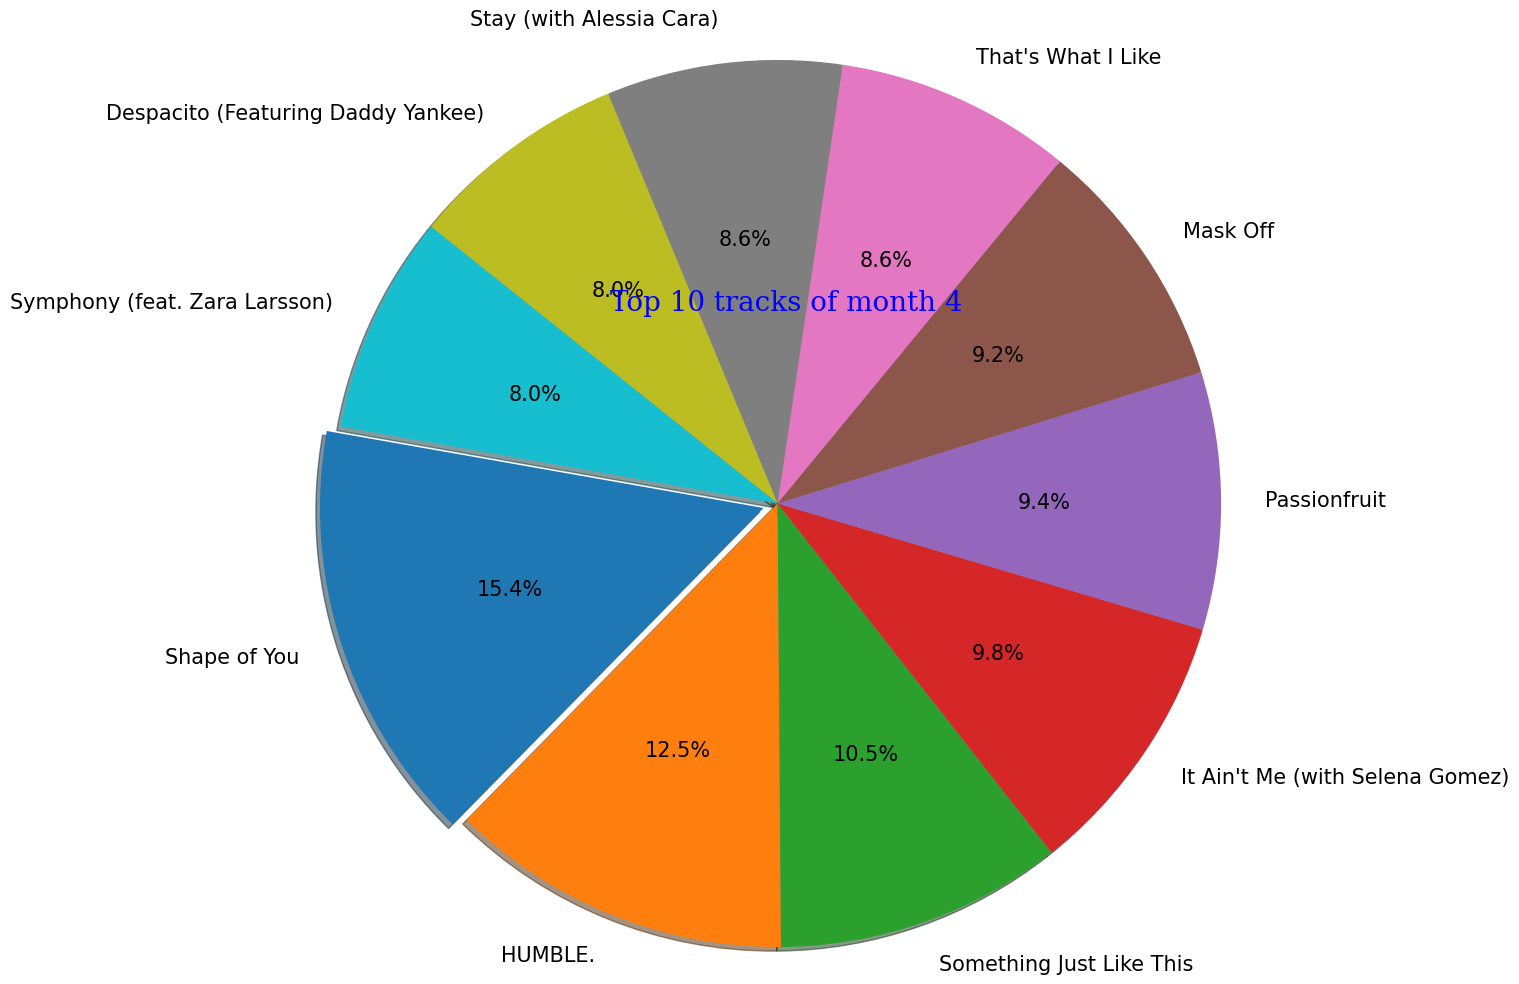

In [241]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 4", fontdict = font1, loc = 'right')

 plt.pie(month4_top10['No of Streams'], labels = month4_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),textprops={'fontsize': 15}, startangle=170, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 5

In [199]:
month5_track_analysis=data[data['Month']==5].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month5_track_analysis.fillna(0, inplace=True)

month5_track_analysis.head()

Month,5
Track Name,
'Till I Collapse,1542157
(Your Love Keeps Lifting Me) Higher & Higher,3164
"0 Sentimientos (Remix) [feat. Noriel, Darkiel, Lyan, Messiah & Baby Rasta]",835724
1 Night,166178
1-2-3,45383


In [200]:
month5_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month5_top10['No of Streams']=sorted(month5_track_analysis[5],reverse=True)[:10]

for i in range(len(month5_top10['No of Streams'])):
    
    month5_top10['top 10 tracks'][i]=month5_track_analysis.index[month5_track_analysis[5] == month5_top10['No of Streams'][i]].values[0]

month5_top10

,No of Streams,top 10 tracks
0,389445999,Despacito - Remix
1,323519523,I'm the One
2,269169687,Shape of You
3,242281099,HUMBLE.
4,200111087,Despacito (Featuring Daddy Yankee)
5,180559007,Mask Off
6,179955790,Something Just Like This
7,177947621,It Ain't Me (with Selena Gomez)
8,176864082,Stay (with Alessia Cara)
9,170945780,Swalla (feat. Nicki Minaj & Ty Dolla $ign)


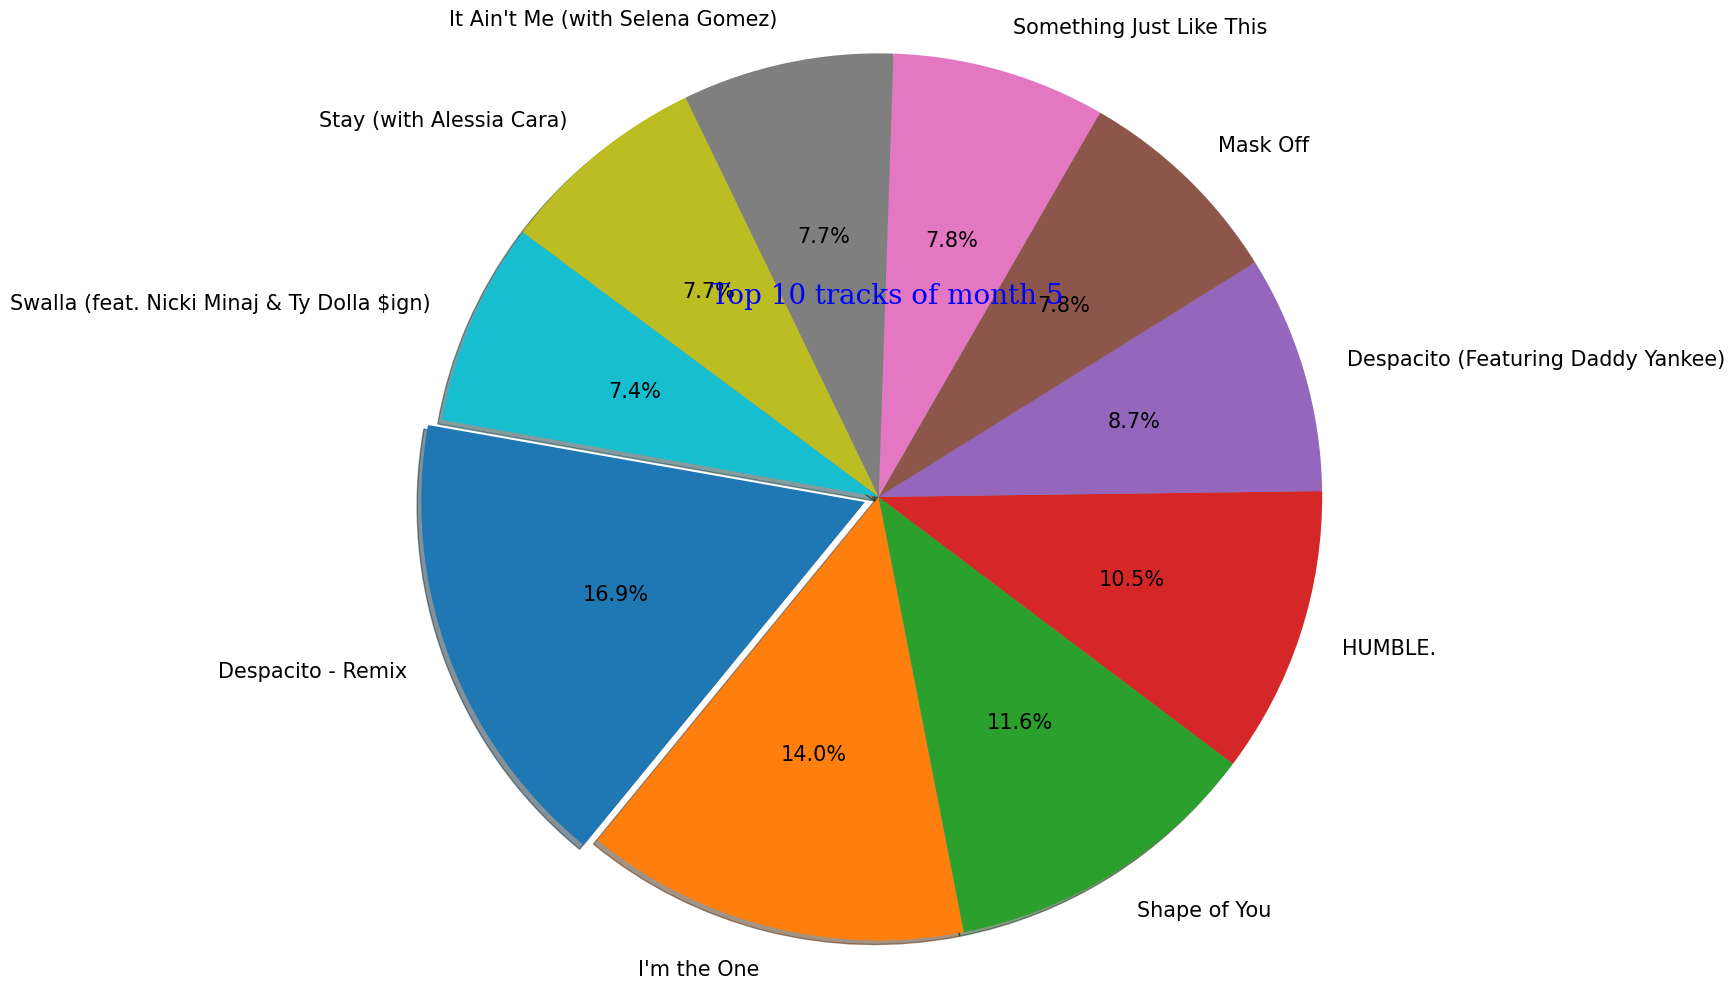

In [242]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 5", fontdict = font1, loc = 'right')

 plt.pie(month5_top10['No of Streams'], labels = month5_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),textprops={'fontsize': 15}, startangle=170, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 6

In [202]:
month6_track_analysis=data[data['Month']==6].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month6_track_analysis.fillna(0, inplace=True)

month6_track_analysis.head()

Month,6
Track Name,
#CTZK,47884
#Elämänpeli (feat. Touko),16205
#Sohavégetnemérős,1032
&Run,7759
'Till I Collapse,2530729


In [203]:
month6_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month6_top10['No of Streams']=sorted(month6_track_analysis[6],reverse=True)[:10]

for i in range(len(month6_top10['No of Streams'])):
    
    month6_top10['top 10 tracks'][i]=month6_track_analysis.index[month6_track_analysis[6] == month6_top10['No of Streams'][i]].values[0]

month6_top10

,No of Streams,top 10 tracks
0,384304420,Despacito - Remix
1,266738600,I'm the One
2,219295280,Shape of You
3,181656672,Unforgettable
4,181210382,Attention
5,180304289,HUMBLE.
6,178179336,2U (feat. Justin Bieber)
7,160972086,Swalla (feat. Nicki Minaj & Ty Dolla $ign)
8,160245685,Strip That Down
9,160193782,There's Nothing Holdin' Me Back


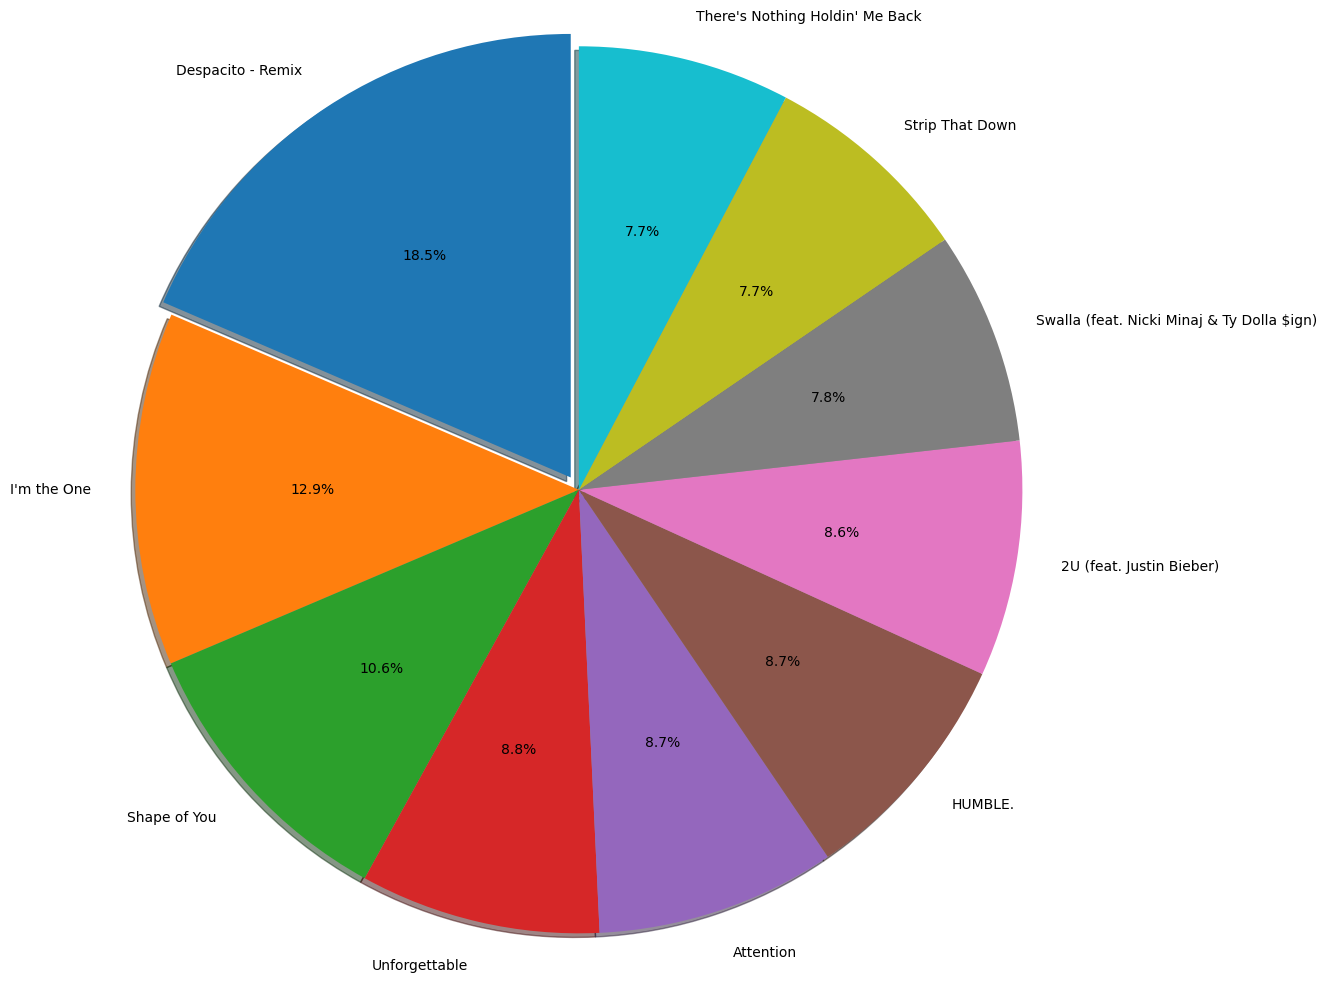

In [204]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 6", fontdict = font1, loc = 'right')

 plt.pie(month6_top10['No of Streams'], labels = month6_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 7

In [205]:
month7_track_analysis=data[data['Month']==7].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month7_track_analysis.fillna(0, inplace=True)

month7_track_analysis.head()

Month,7
Track Name,
#CTZK,91576
#Elämänpeli (feat. Touko),315677
#LDL,51922
'Till I Collapse,8880008
"0 Sentimientos (Remix) [feat. Noriel, Darkiel, Lyan, Messiah & Baby Rasta]",600278


In [206]:
month7_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month7_top10['No of Streams']=sorted(month7_track_analysis[7],reverse=True)[:10]

for i in range(len(month7_top10['No of Streams'])):
    
    month7_top10['top 10 tracks'][i]=month7_track_analysis.index[month7_track_analysis[7] == month7_top10['No of Streams'][i]].values[0]

month7_top10

,No of Streams,top 10 tracks
0,324530644,Despacito - Remix
1,256949490,Wild Thoughts
2,226012044,I'm the One
3,214483329,Unforgettable
4,201584493,Mi Gente
5,201501855,2U (feat. Justin Bieber)
6,199073911,Shape of You
7,194551148,Feels
8,185368291,Attention
9,172640918,Strip That Down


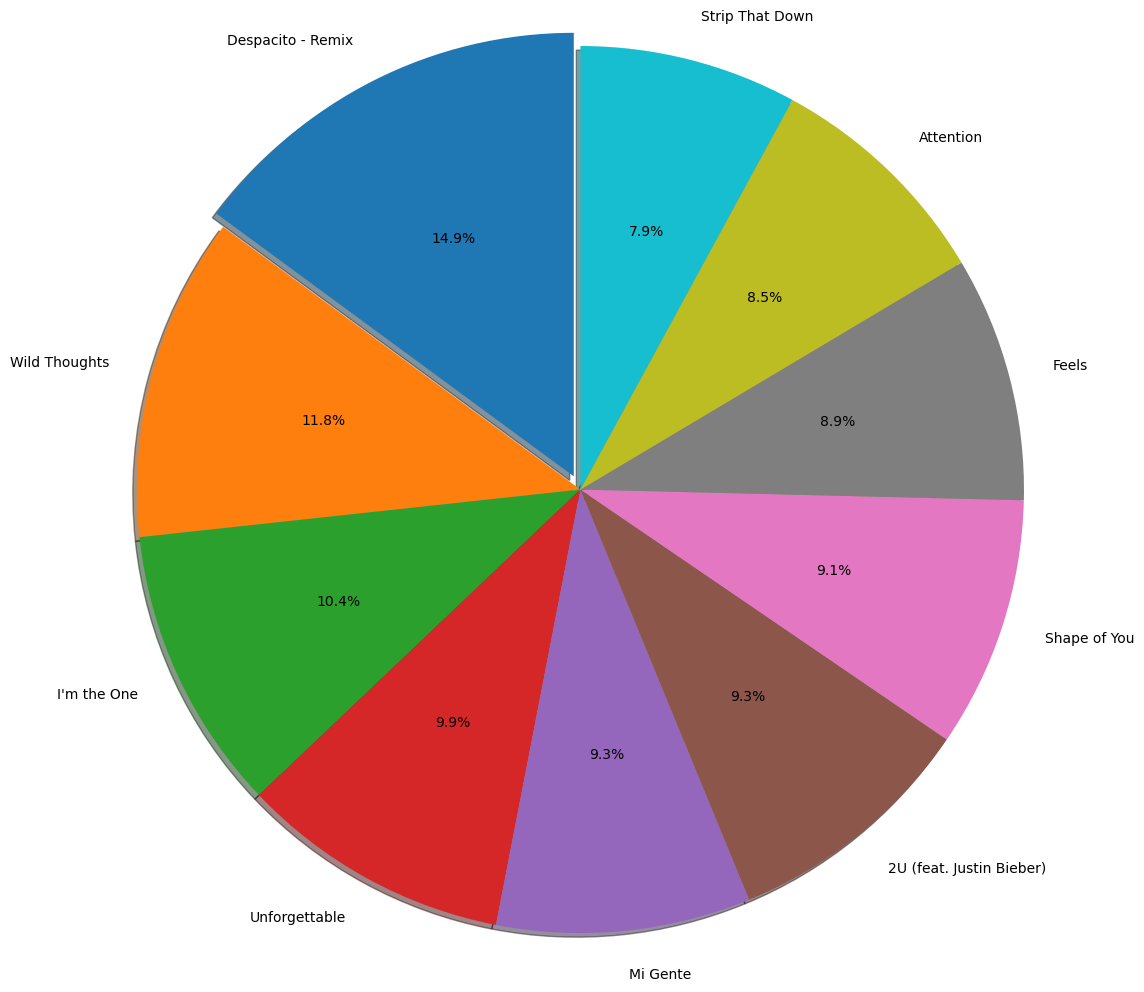

In [207]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 7", fontdict = font1, loc = 'right')

 plt.pie(month7_top10['No of Streams'], labels = month7_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 8

In [243]:
month8_track_analysis=data[data['Month']==8].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month8_track_analysis.fillna(0, inplace=True)

month8_track_analysis.head()

Month,8
Track Name,
#CTZK,135345
#Elämänpeli (feat. Touko),73889
#Lávkóma,19921
'Till I Collapse,15931749
(Not) The One,1751674


In [246]:
month8_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month8_top10['No of Streams']=sorted(month8_track_analysis[8],reverse=True)[:10]

for i in range(len(month8_top10['No of Streams'])):
    
    month8_top10['top 10 tracks'][i]=month8_track_analysis.index[month8_track_analysis[8] == month8_top10['No of Streams'][i]].values[0]

month8_top10

,No of Streams,top 10 tracks
0,281206000,Mi Gente
1,224116198,Unforgettable
2,218671024,Despacito - Remix
3,206564097,Wild Thoughts
4,198136467,Feels
5,173896451,2U (feat. Justin Bieber)
6,170458204,New Rules
7,168310616,Attention
8,166852553,Shape of You
9,160631157,I'm the One


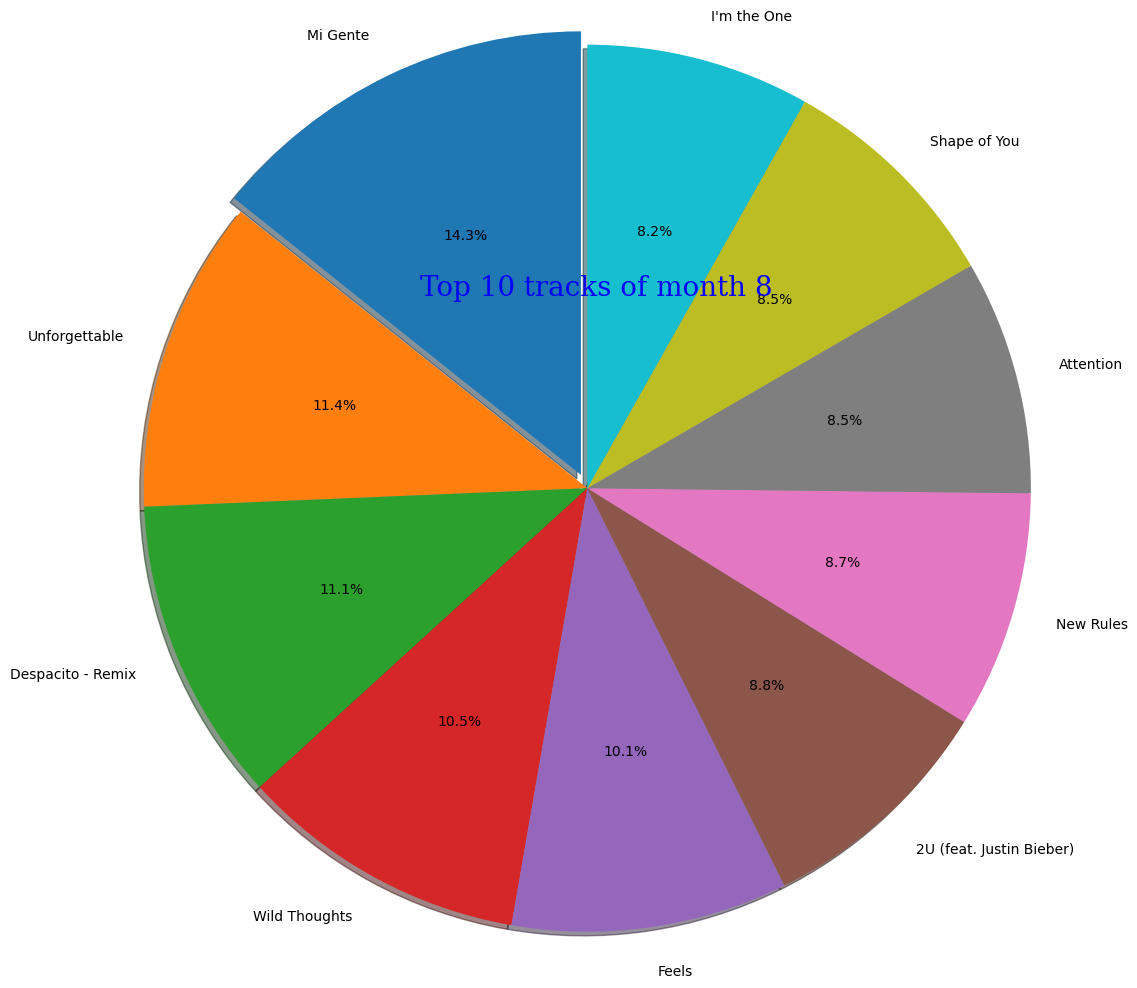

In [247]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 8", fontdict = font1, loc = 'right')

 plt.pie(month8_top10['No of Streams'], labels = month8_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 9

In [248]:
month9_track_analysis=data[data['Month']==9].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month9_track_analysis.fillna(0, inplace=True)

month9_track_analysis.head()

Month,9
Track Name,
#Biziz - feat. Lil Bege,271192
#CTZK,152572
#Lávkóma,33943
#愛,3218
'Till I Collapse,12097744


In [250]:
month9_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month9_top10['No of Streams']=sorted(month9_track_analysis[9],reverse=True)[:10]

for i in range(len(month9_top10['No of Streams'])):
    
    month9_top10['top 10 tracks'][i]=month9_track_analysis.index[month9_track_analysis[9] == month9_top10['No of Streams'][i]].values[0]

month9_top10

,No of Streams,top 10 tracks
0,237994936,Mi Gente
1,228981593,Look What You Made Me Do
2,216157306,New Rules
3,201156991,Unforgettable
4,183878821,1-800-273-8255
5,182502201,rockstar
6,175566660,Friends (with BloodPop®)
7,173764277,Havana
8,162890402,Silence
9,162877722,Too Good At Goodbyes - Edit


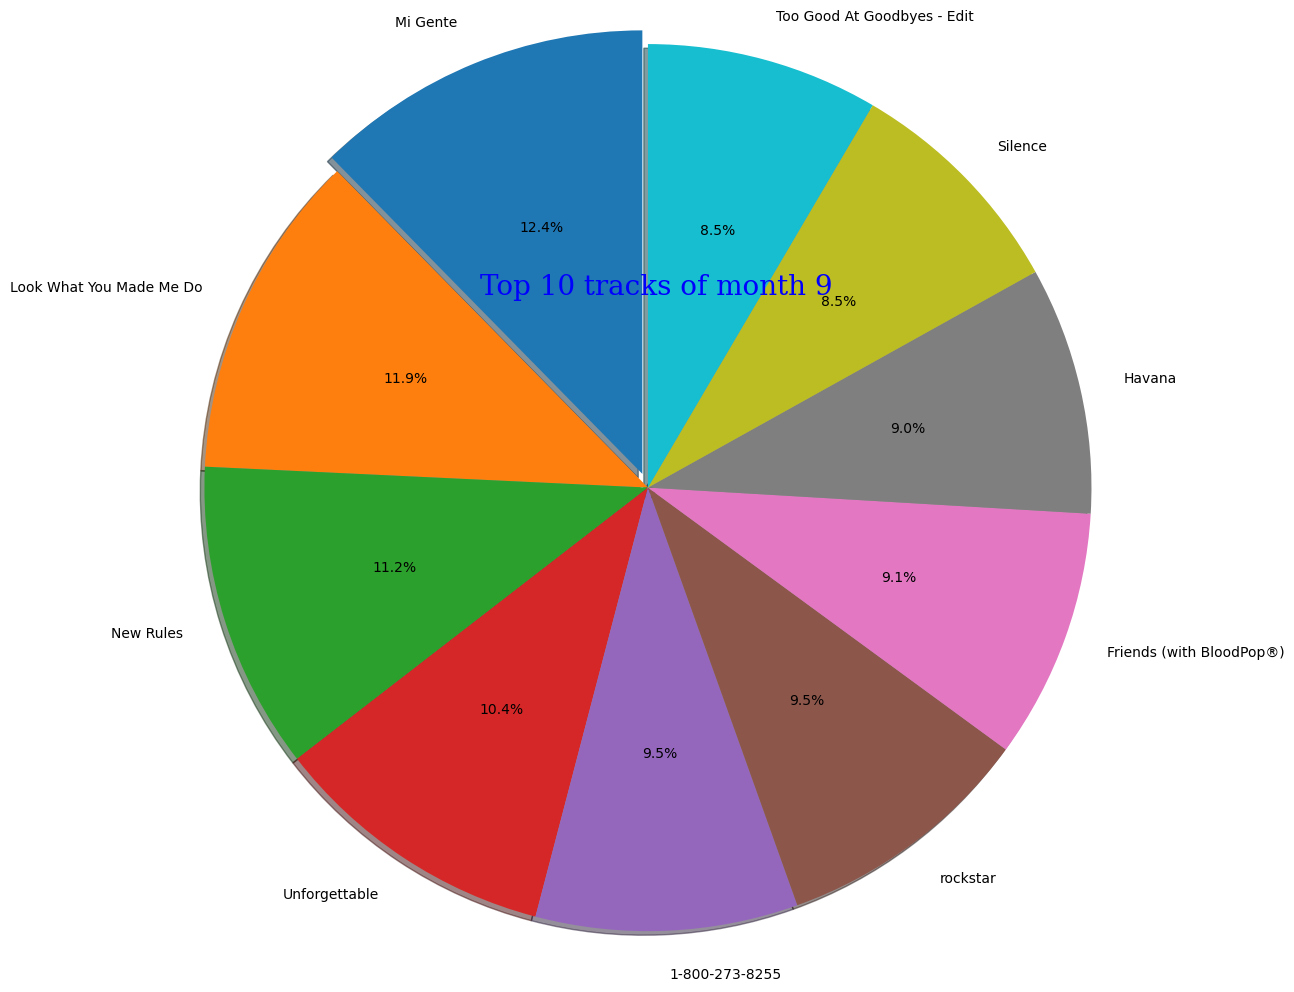

In [251]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 9", fontdict = font1, loc = 'right')

 plt.pie(month9_top10['No of Streams'], labels = month9_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 10

In [252]:
month10_track_analysis=data[data['Month']==10].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month10_track_analysis.fillna(0, inplace=True)

month10_track_analysis.head()

Month,10
Track Name,
"""Read All About It, Pt. III""",22826
#Biziz - feat. Lil Bege,132399
#CTZK,178864
#Lávkóma,8686
'Till I Collapse,25775039


In [253]:
month10_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month10_top10['No of Streams']=sorted(month10_track_analysis[10],reverse=True)[:10]

for i in range(len(month10_top10['No of Streams'])):
    
    month10_top10['top 10 tracks'][i]=month10_track_analysis.index[month10_track_analysis[10] == month10_top10['No of Streams'][i]].values[0]

month10_top10

,No of Streams,top 10 tracks
0,391652771,rockstar
1,222690964,New Rules
2,219162867,Havana
3,192981869,Dusk Till Dawn - Radio Edit
4,191585631,Too Good At Goodbyes - Edit
5,178190403,1-800-273-8255
6,174954249,What Lovers Do (feat. SZA)
7,166719016,Silence
8,164456329,Perfect
9,150627119,Mi Gente


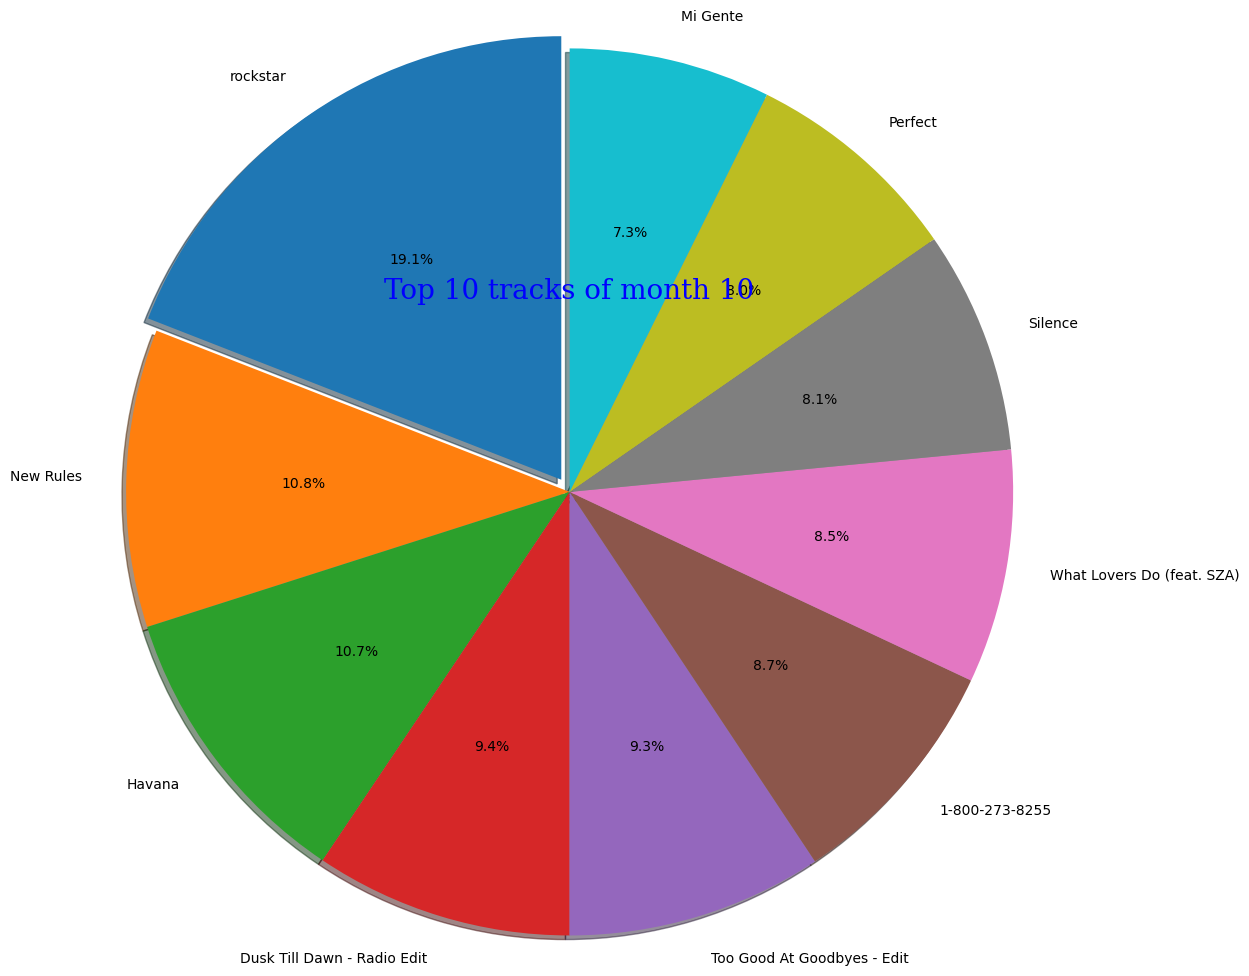

In [254]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 10", fontdict = font1, loc = 'right')

 plt.pie(month10_top10['No of Streams'], labels = month10_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 11

In [255]:
month11_track_analysis=data[data['Month']==11].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month11_track_analysis.fillna(0, inplace=True)

month11_track_analysis.head()

Month,11
Track Name,
#CTZK,63322
#JM,3723525
#Natural,1774917
#PTD,351224
'Till I Collapse,19843859


In [258]:
month11_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month11_top10['No of Streams']=sorted(month11_track_analysis[11],reverse=True)[:10]

for i in range(len(month11_top10['No of Streams'])):
    
    month11_top10['top 10 tracks'][i]=month11_track_analysis.index[month11_track_analysis[11] == month11_top10['No of Streams'][i]].values[0]

month11_top10

,No of Streams,top 10 tracks
0,325969141,rockstar
1,266548375,Havana
2,212010163,New Rules
3,194996010,Wolves
4,194026562,Too Good At Goodbyes
5,192207068,Perfect
6,183660359,What Lovers Do (feat. SZA)
7,181176152,Gucci Gang
8,165874161,Dusk Till Dawn - Radio Edit
9,164615758,Let You Down


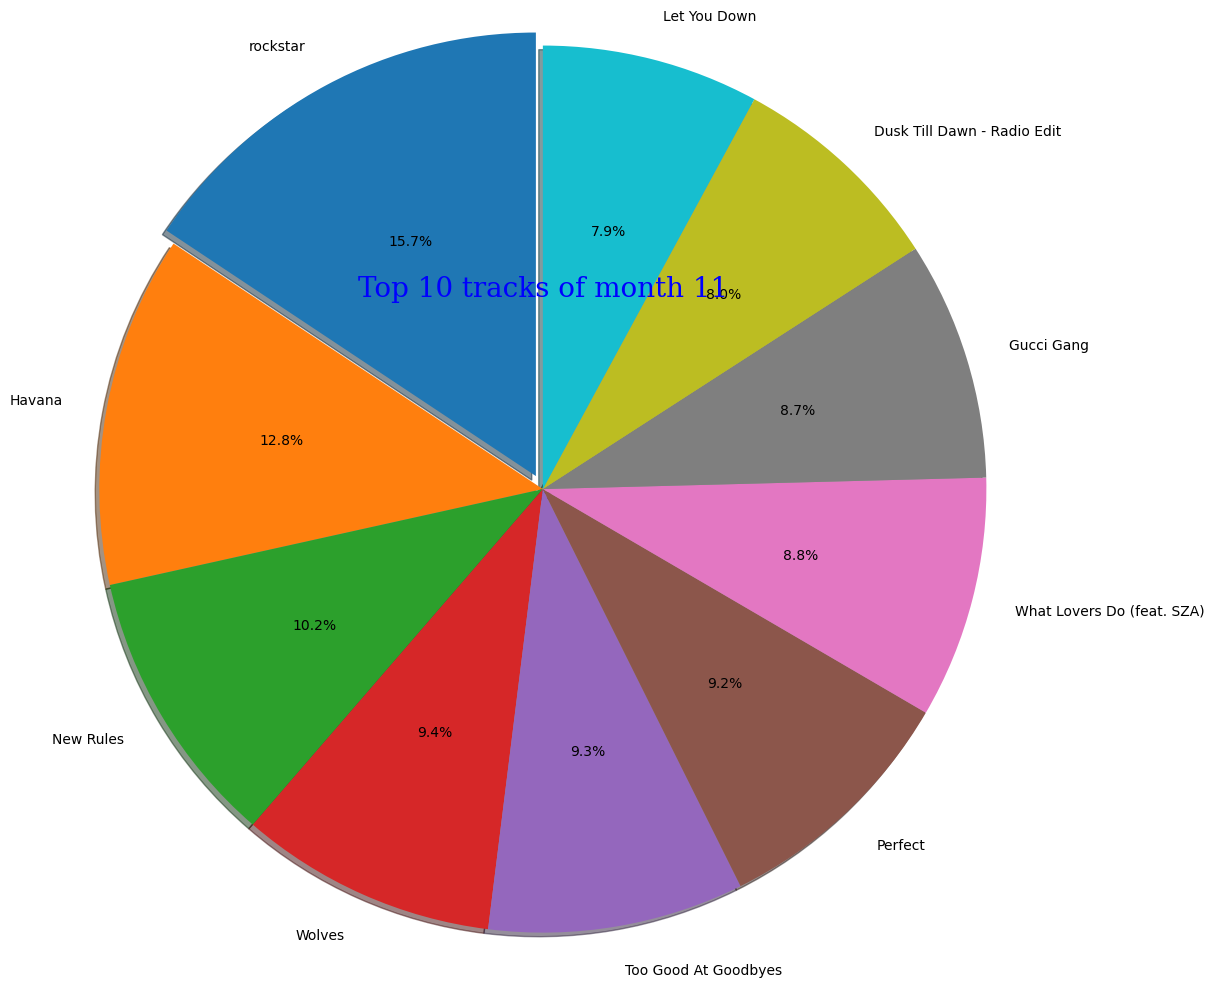

In [259]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 11", fontdict = font1, loc = 'right')

 plt.pie(month11_top10['No of Streams'], labels = month11_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 12

In [260]:
month12_track_analysis=data[data['Month']==12].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month12_track_analysis.fillna(0, inplace=True)

month12_track_analysis.head()

Month,12
Track Name,
#JM,2567477
#Natural,4337741
#PTD,325185
#SELFIE,18668
#Totopirate,56854


In [261]:
month12_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month12_top10['No of Streams']=sorted(month12_track_analysis[12],reverse=True)[:10]

for i in range(len(month12_top10['No of Streams'])):
    
    month12_top10['top 10 tracks'][i]=month12_track_analysis.index[month12_track_analysis[12] == month12_top10['No of Streams'][i]].values[0]

month12_top10

,No of Streams,top 10 tracks
0,286287465,rockstar
1,235288245,Havana
2,192760797,New Rules
3,185293356,Wolves
4,182200692,All I Want for Christmas Is You
5,174411183,Perfect Duet (Ed Sheeran & Beyoncé)
6,170132871,Perfect
7,162152617,Gucci Gang
8,161798224,Let You Down
9,154929392,Too Good At Goodbyes


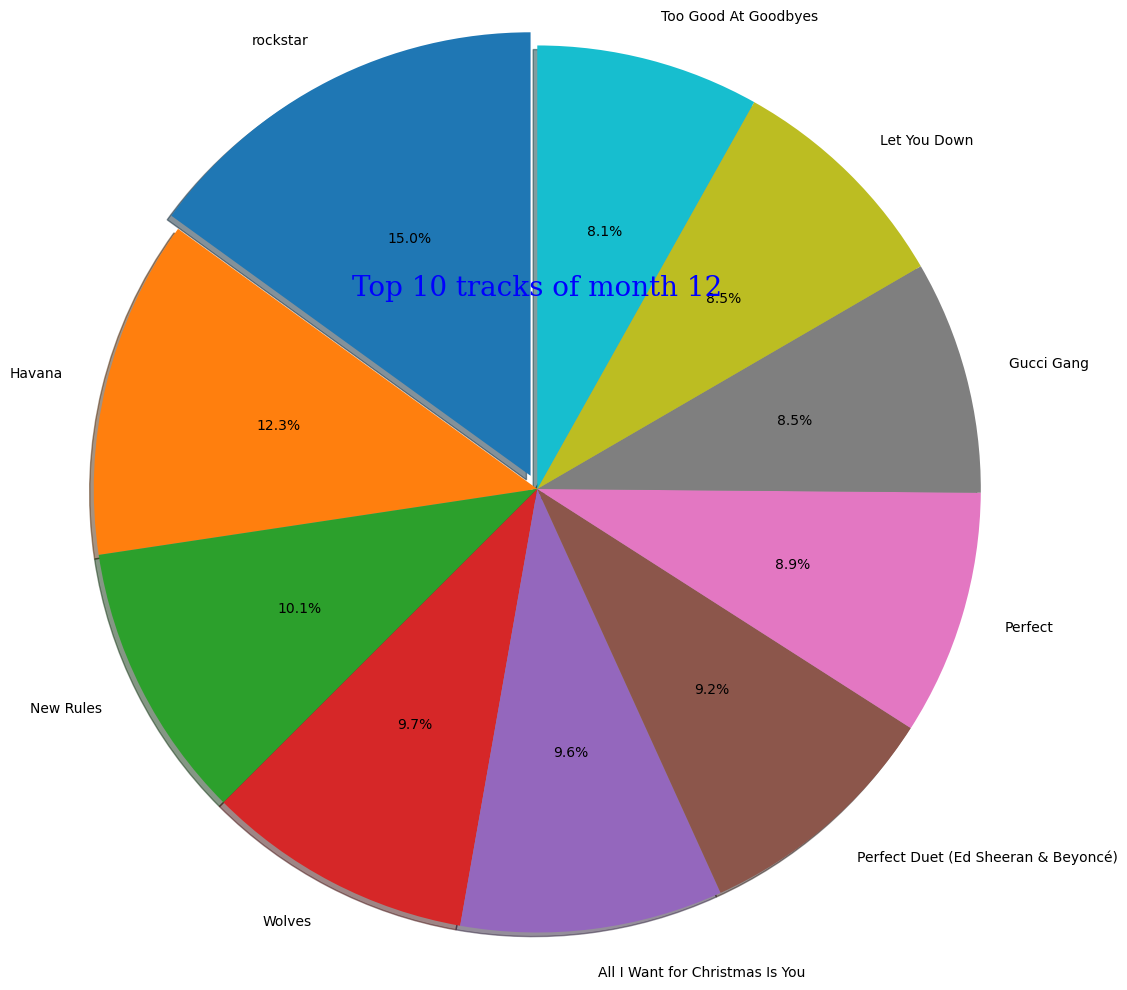

In [262]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 12", fontdict = font1, loc = 'right')

 plt.pie(month12_top10['No of Streams'], labels = month12_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

# Region vs track

In [54]:
data.head()

,Position,Track Name,Artist,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
0,1,Reggaetón Lento (Bailemos),897,19272,ec,2017,1,1,1,6
1,2,Chantaje,5194,19270,ec,2017,1,1,1,6
2,3,Otra Vez (feat. J Balvin),6331,15761,ec,2017,1,1,1,6
3,4,Vente Pa' Ca,4854,14954,ec,2017,1,1,1,6
4,5,Safari,2523,14269,ec,2017,1,1,1,6


In [55]:
Analysis_track_Region=data.pivot_table('Streams', ['Track Name'], 'Region', aggfunc='sum').copy()

Analysis_track_Region.fillna(0, inplace=True)

Analysis_track_Region.head()

Region,ar,at,au,be,bo,br,ca,ch,cl,co,...,pt,py,se,sg,sk,sv,tr,tw,us,uy
Track Name,,,,,,,,,,,,,,,,,,,,,
"""All That Is or Ever Was or Ever Will Be""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0
"""Read All About It, Pt. III""",0.0,0.0,0.0,15971.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17307.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Askip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Biziz - feat. Lil Bege,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,403591.0,0.0,0.0,0.0


In [56]:
track_Region=pd.DataFrame(columns=['Region','Most Popular track of this region','No of Streams']).copy()

for i in track_Region:
    
    track_Region[i]=np.zeros(54, dtype=int)
    
track_Region.head()

,Region,Most Popular track of this region,No of Streams
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [57]:
index=0

for i in Analysis_track_Region:
    
    track_Region['Region'][index]=i
    
    track_Region['No of Streams'][index]=sorted(Analysis_track_Region.iloc[:,index],reverse=True)[0]
    
    track_Region['Most Popular track of this region'][index]= Analysis_track_Region.index[Analysis_track_Region.iloc[:,index]==track_Region['No of Streams'][index]].values[0]
    
    index=index+1

track_Region.head()

,Region,Most Popular track of this region,No of Streams
0,ar,Despacito (Featuring Daddy Yankee),53340691
1,at,Shape of You,5730722
2,au,Shape of You,51946735
3,be,Shape of You,11255872
4,bo,Me Rehúso,2647248


creating a list of Tracks with most streams on a particular month and creating a column for their respective streams each month

In [58]:
tracks=track_Region['Most Popular track of this region'].value_counts().index.tolist()

for i in tracks:
    
    track_Region[i]=Analysis_track_Region.loc[i].tolist()

In [59]:
track_Region.head()

,Region,Most Popular track of this region,No of Streams,Shape of You,Me Rehúso,Despacito (Featuring Daddy Yankee),Despacito - Remix,HUMBLE.
0,ar,Despacito (Featuring Daddy Yankee),53340691,41734990.0,49869355.0,53340691.0,21158376.0,1192877.0
1,at,Shape of You,5730722,5730722.0,614389.0,2767451.0,2727022.0,1526147.0
2,au,Shape of You,51946735,51946735.0,168753.0,5765439.0,31981918.0,32822787.0
3,be,Shape of You,11255872,11255872.0,610056.0,4327111.0,4849099.0,3658626.0
4,bo,Me Rehúso,2647248,1866375.0,2647248.0,2017089.0,729159.0,115876.0


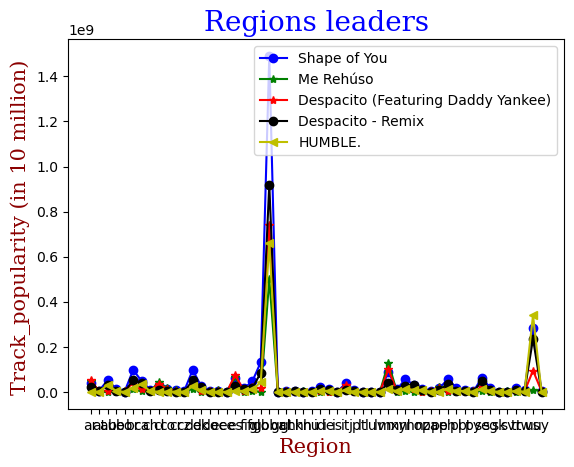

In [60]:
 # fonts

 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # font of axes
 font2 = {'family':'serif','color':'darkred','size':15}

 # font of text displayed on graph
 font_text = {'family':'serif','color':'darkgreen','size':10}
 
    
    
 # plotting title and x,y labels on graph

 # Title
 plt.title("Regions leaders", fontdict = font1)

 # Y label
 plt.ylabel("Track_popularity (in 10 million) ", fontdict = font2)

 # X label
 plt.xlabel("Region", fontdict = font2)


    
 plt.plot(track_Region['Region'], track_Region['Shape of You'], 'bo-',label='Shape of You')
    
 plt.plot(track_Region['Region'], track_Region['Me Rehúso'], 'g*-', label='Me Rehúso')
    
 plt.plot(track_Region['Region'], track_Region['Despacito (Featuring Daddy Yankee)'], 'r*-', label='Despacito (Featuring Daddy Yankee)')

 plt.plot(track_Region['Region'], track_Region['Despacito - Remix'], color='black', marker='o', label='Despacito - Remix')
    
 plt.plot(track_Region['Region'], track_Region['HUMBLE.'], 'y<-', label='HUMBLE.')
    

 plt.legend()

 
 # show the plot
 plt.show()

### top 10 regions

Now lets see similar analysis for 10 of the strongest regions in terms of streaming capacity to get a broader picture

In [61]:
region_streams_count=data.pivot_table('Streams', 'Region', aggfunc='sum').copy()
region_streams_count.head()

,Streams
Region,
ar,2775453630
at,344237624
au,3371290725
be,556653402
bo,97190104


In [62]:
top10_streams=sorted(region_streams_count['Streams'],reverse=True)[0:11]
top10_streams

[76822326299,
 26378175396,
 7184411185,
 6889016005,
 6341450674,
 6071522245,
 3752415229,
 3466573763,
 3371290725,
 3367055952,
 3320110220]

In [63]:
top10_regions=[None]*11
for i in range(len(top10_streams)):
    top10_regions[i]=region_streams_count.index[region_streams_count['Streams']==top10_streams[i]].tolist()[0]
top10_regions

['global', 'us', 'gb', 'br', 'mx', 'de', 'es', 'nl', 'au', 'se', 'ph']

10 regions analysis

In [64]:
Analysis_track_Region=data[data['Region'].isin(top10_regions)].pivot_table('Streams', ['Track Name'], 'Region', aggfunc='sum').copy()

Analysis_track_Region.fillna(0, inplace=True)

Analysis_track_Region.head()

Region,au,br,de,es,gb,global,mx,nl,ph,se,us
Track Name,,,,,,,,,,,
"""Read All About It, Pt. III""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17307.0,0.0
#JM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6731857.0,0.0,0.0,0.0
#Natural,0.0,0.0,0.0,1595111.0,0.0,0.0,4357200.0,0.0,0.0,0.0,0.0
'Till I Collapse,2898285.0,0.0,9659981.0,0.0,1057485.0,65631702.0,0.0,0.0,0.0,3434268.0,36493752.0
(Don't Fear) The Reaper,0.0,0.0,0.0,0.0,148779.0,613988.0,0.0,0.0,0.0,0.0,543066.0


In [65]:
track_Region=pd.DataFrame(columns=['Region','Most Popular track of this region','No of Streams']).copy()

for i in track_Region:
    
    track_Region[i]=np.zeros(54, dtype=int)
    
track_Region.head()

,Region,Most Popular track of this region,No of Streams
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [66]:
index=0

for i in Analysis_track_Region:
    
    track_Region['Region'][index]=i
    
    track_Region['No of Streams'][index]=sorted(Analysis_track_Region.iloc[:,index],reverse=True)[0]
    
    track_Region['Most Popular track of this region'][index]= Analysis_track_Region.index[Analysis_track_Region.iloc[:,index]==track_Region['No of Streams'][index]].values[0]
    
    index=index+1
    
track_Region = track_Region.iloc[:11,:].copy()

track_Region

,Region,Most Popular track of this region,No of Streams
0,au,Shape of You,51946735
1,br,Shape of You,97680541
2,de,Shape of You,97689020
3,es,Despacito (Featuring Daddy Yankee),76680279
4,gb,Shape of You,132102967
5,global,Shape of You,1490812208
6,mx,Me Rehúso,129648745
7,nl,Shape of You,56167880
8,ph,Shape of You,57836288
9,se,Shape of You,63869649


For top 10 regions, creating a list of Tracks with most streams on a particular month and creating a column for their respective streams each month

In [67]:
tracks=track_Region['Most Popular track of this region'].value_counts().index.tolist()

for i in tracks:
    
    track_Region[i]=Analysis_track_Region.loc[i].tolist()

track_Region

,Region,Most Popular track of this region,No of Streams,Shape of You,Despacito (Featuring Daddy Yankee),Me Rehúso,HUMBLE.
0,au,Shape of You,51946735,5.194674e+07,5765439.0,168753.0,32822787.0
1,br,Shape of You,97680541,9.768054e+07,42196195.0,11742120.0,16140468.0
2,de,Shape of You,97689020,9.768902e+07,42735504.0,13338359.0,24646647.0
3,es,Despacito (Featuring Daddy Yankee),76680279,6.085337e+07,76680279.0,67004877.0,4777845.0
4,gb,Shape of You,132102967,1.321030e+08,15636898.0,0.0,42570213.0
5,global,Shape of You,1490812208,1.490812e+09,742841612.0,501266859.0,662179904.0
6,mx,Me Rehúso,129648745,8.759208e+07,99837121.0,129648745.0,13612852.0
7,nl,Shape of You,56167880,5.616788e+07,22059895.0,4583184.0,10815612.0
8,ph,Shape of You,57836288,5.783629e+07,5571243.0,0.0,12736672.0
9,se,Shape of You,63869649,6.386965e+07,20331521.0,3501230.0,14003369.0


global looks like world s global location so removing it

In [68]:
track_Region=track_Region[track_Region['Region'] != 'global'].copy()
track_Region.set_index([pd.Index(range(10))],inplace=True)
track_Region

,Region,Most Popular track of this region,No of Streams,Shape of You,Despacito (Featuring Daddy Yankee),Me Rehúso,HUMBLE.
0,au,Shape of You,51946735,51946735.0,5765439.0,168753.0,32822787.0
1,br,Shape of You,97680541,97680541.0,42196195.0,11742120.0,16140468.0
2,de,Shape of You,97689020,97689020.0,42735504.0,13338359.0,24646647.0
3,es,Despacito (Featuring Daddy Yankee),76680279,60853374.0,76680279.0,67004877.0,4777845.0
4,gb,Shape of You,132102967,132102967.0,15636898.0,0.0,42570213.0
5,mx,Me Rehúso,129648745,87592084.0,99837121.0,129648745.0,13612852.0
6,nl,Shape of You,56167880,56167880.0,22059895.0,4583184.0,10815612.0
7,ph,Shape of You,57836288,57836288.0,5571243.0,0.0,12736672.0
8,se,Shape of You,63869649,63869649.0,20331521.0,3501230.0,14003369.0
9,us,HUMBLE.,339677217,282319891.0,94972759.0,9373526.0,339677217.0


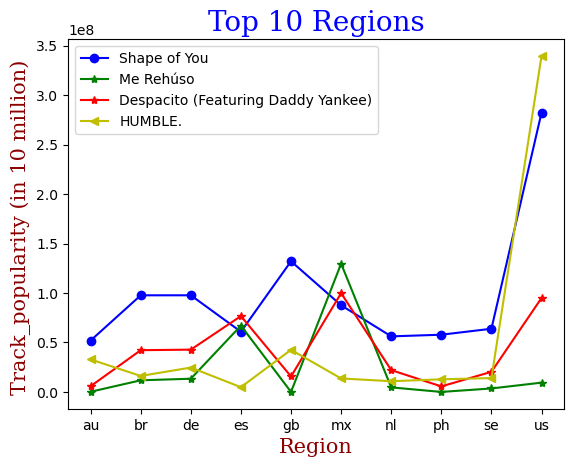

In [69]:
 # fonts

 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # font of axes
 font2 = {'family':'serif','color':'darkred','size':15}

 # font of text displayed on graph
 font_text = {'family':'serif','color':'darkgreen','size':10}
 
    
    
 # plotting title and x,y labels on graph

 # Title
 plt.title("Top 10 Regions", fontdict = font1)

 # Y label
 plt.ylabel("Track_popularity (in 10 million) ", fontdict = font2)

 # X label
 plt.xlabel("Region", fontdict = font2)


    
 plt.plot(track_Region['Region'], track_Region['Shape of You'], 'bo-',label='Shape of You')
    
 plt.plot(track_Region['Region'], track_Region['Me Rehúso'], 'g*-', label='Me Rehúso')
    
 plt.plot(track_Region['Region'], track_Region['Despacito (Featuring Daddy Yankee)'], 'r*-', label='Despacito (Featuring Daddy Yankee)')

 plt.plot(track_Region['Region'], track_Region['HUMBLE.'], 'y<-', label='HUMBLE.')
    

 plt.legend()

 
 # show the plot
 plt.show()

## making model

target column is position

In [47]:
target='Position'

train, validation and test datasets

In [47]:
train_data=data[data['Position']<=100].copy()
train_data.head()

,Position,Track Name,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
0,1,12081,19272,15,2017,1,1,1,6
1,2,2412,19270,15,2017,1,1,1,6
2,3,10924,15761,15,2017,1,1,1,6
3,4,15445,14954,15,2017,1,1,1,6
4,5,12461,14269,15,2017,1,1,1,6


In [49]:
val_data=data[data['Position']<=150][data['Position']>=101].copy()
val_data.head()

,Position,Track Name,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
100,101,12678,2079,15,2017,1,1,1,6
101,102,11833,2071,15,2017,1,1,1,6
102,103,14413,2038,15,2017,1,1,1,6
103,104,11874,2035,15,2017,1,1,1,6
104,105,7228,1982,15,2017,1,1,1,6


In [51]:
test_data=data[data['Position']<=200][data['Position']>=151].copy()
test_data.head()

,Position,Track Name,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
150,151,15963,1454,15,2017,1,1,1,6
151,152,4798,1454,15,2017,1,1,1,6
152,153,14135,1454,15,2017,1,1,1,6
153,154,9259,1440,15,2017,1,1,1,6
154,155,13095,1433,15,2017,1,1,1,6


train data

In [53]:
train_x=train_data[[i for i in train_data if i not in [target]]].copy()
train_x.head()

,Track Name,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
0,12081,19272,15,2017,1,1,1,6
1,2412,19270,15,2017,1,1,1,6
2,10924,15761,15,2017,1,1,1,6
3,15445,14954,15,2017,1,1,1,6
4,12461,14269,15,2017,1,1,1,6


In [54]:
train_y=train_data[target].copy()
train_y.head()

0    1
1    2
2    3
3    4
4    5
Name: Position, dtype: int64

val

In [55]:
val_x=val_data[[i for i in val_data if i not in [target]]].copy()
val_x.head()

,Track Name,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
100,12678,2079,15,2017,1,1,1,6
101,11833,2071,15,2017,1,1,1,6
102,14413,2038,15,2017,1,1,1,6
103,11874,2035,15,2017,1,1,1,6
104,7228,1982,15,2017,1,1,1,6


In [56]:
val_y=val_data[target].copy()
val_y.head()

100    101
101    102
102    103
103    104
104    105
Name: Position, dtype: int64

test

In [57]:
test_x=test_data[[i for i in test_data if i not in [target]]].copy()
test_x.head()

,Track Name,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
150,15963,1454,15,2017,1,1,1,6
151,4798,1454,15,2017,1,1,1,6
152,14135,1454,15,2017,1,1,1,6
153,9259,1440,15,2017,1,1,1,6
154,13095,1433,15,2017,1,1,1,6


In [58]:
test_y=test_data[target].copy()
test_y.head()

150    151
151    152
152    153
153    154
154    155
Name: Position, dtype: int64

modelling

In [59]:
import xgboost as xgb
from xgboost import XGBRegressor as xgbr

In [60]:
xgbm=xgbr(random_state=r,verbosity=0)

base model

In [61]:
xgbmmodel = xgbm
xgbmmodel.fit(train_x,train_y)
pred=xgbmmodel.predict(val_x)
predtr=xgbmmodel.predict(train_x)
predt=xgbmmodel.predict(test_x)
[rmse(test_y, predt,squared=True),rmse(val_y, pred,squared=True),rmse(train_y, predtr,squared=True)]

[7343.767615625392, 1379.6075211640368, 36.646598897581576]

hyperparameter tuning

In [62]:
kval_n=2
def kval(main,step,n=kval_n):

 klist=[]
 if (step<0.0001):
    step=0.0001
 if (step==0):
    step=0.0001
 i=main-step*n
 if (main>=0):
  while (i<=main+step*n):
    
    klist.append(i)
    i=i+step
  return klist
 else:
  while (i>=main+step*n):
    
    klist.append(i)
    i=i+step
  return klist
  

In [63]:
def kvall(main,step,n=kval_n):

 klist=[]
 if (step<0.0001):
    step=0.0001
 if (step==0):
    step=0.0001
 i=main-step*n
 if (main>=0):
  while (i<=main):
    
    klist.append(i)
    i=i+step
  return klist
 else:
  while (i>main+step*n):
    
    klist.append(i)
    i=i+step
  return klist

In [64]:
#xgbmdecstep steps the values of hyperparameter (which accepts float values) in kval
xgbmdecstep=3
xgbmdecbreaker=2*(xgbmdecstep+1)

xgbmgsdecstep=int(2)
xgbmgsdecbreaker=1*(xgbmgsdecstep+1)

earlystopping=1

In [65]:
depth=kval(100,10,10)
decimal=kval(0.25,(0.25/5),4)
subdecimal=kval(0.05,(0.05/5),4)

In [66]:
default={'learning_rate':0.03,'subsample':1,'colsample_bylevel':0.9,'colsample_bynode':0.9,'colsample_bytree':0.9}

In [67]:
xgbmdict={'max_depth':kval(100,5,10),
'n_estimators':kval(100,5,10),
 'min_samples_split':decimal,
 'min_weight_fraction_leaf':decimal,
 'min_impurity_decrease':decimal,
 'min_impurity_split':decimal,
'loss':['ls', 'lad', 'huber', 'quantile'],
'learning_rate':kval(0.1,0.1/10,5),
'n_estimators':kval(100,10,5),
'subsample':kval(0.9,0.02,5),
'criterion':['friedman_mse', 'mse'],
'colsample_bylevel':kval(0.75,0.05,4),
'colsample_bynode':kval(0.75,0.05,4),
'colsample_bytree':kval(0.75,0.05,4),
'gamma':kval(0.2,0.05,5),
'reg_alpha':kval(0.2,0.05,5),
'reg_lambda':kval(0.2,0.05,5)}

In [68]:
xgbmbest=xgbmdict.copy()
xgbmmodel = rs(xgbm, xgbmdict,random_state=r)

In [ ]:
xgbmmodel.fit(train_x,train_y)
xgbmbest=xgbmmodel.best_estimator_.get_params().copy()